In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import math 
from ast import literal_eval
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  /content/drive/MyDrive/Updated_Dateset_v5.zip /content/

In [ ]:
!unzip  Updated_Dateset_v5.zip

Archive:  Updated_Dateset_v5.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [ ]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
#df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
#df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
#df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [ ]:
renameDict = {
       'data.http.result.response.headers.server.0':'data.http.result.response.headers.server',
       'data.http.result.response.headers.connection.0':'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via.0':'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges.0': 'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control.0':'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after.0':'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type.0':'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location.0': 'data.http.result.response.headers.location',
       'data.http.result.redirect_response_chain.0.status_line':'data.http.result.redirect_response_chain.status_line',
       'data.http.result.response.headers.etag.0':'data.http.result.response.headers.etag',
       'data.http.result.response.headers.last_modified.0':'data.http.result.response.headers.last_modified',
       'data.http.result.response.headers.vary.0':'data.http.result.response.headers.vary',
       'data.http.result.response.transfer_encoding.0': 'data.http.result.response.transfer_encoding',
       'data.http.result.response.headers.x_powered_by.0':'data.http.result.response.headers.x_powered_by',
       'data.http.result.response.headers.pragma.0':'data.http.result.response.headers.pragma',
       'data.http.result.redirect_response_chain.0.headers.server.0':'data.http.result.redirect_response_chain.headers.server'
}

In [ ]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [ ]:
catfields = [ 'netType', 
              #'Organization',
              'data.http.result.response.headers.server',
               'data.http.result.response.status_code',
              'data.http.result.response.headers.connection',
              'data.http.result.response.headers.via',
              'data.http.result.response.headers.accept_ranges',
              'data.http.result.response.headers.cache_control',
              'data.http.result.response.headers.retry_after',
             # 'data.http.result.response.body',
             # 'data.http.result.response.body_sha256',
              'data.http.result.response.headers.content_type',
              'data.http.result.response.headers.location',
             # 'data.http.result.redirect_response_chain.status_line',
              'data.http.result.response.headers.etag',
              #'data.http.result.response.headers.vary',
              #'data.http.result.response.transfer_encoding',
             # 'data.http.result.response.headers.x_powered_by',
              #'data.http.result.response.headers.pragma',
              'as_name', 'as_no',
              'data.tls.status',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization',
              'vendor'
       ]

In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return -1
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return -1
  else:
    return 1

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

def featureImportance(clf):
  importance = clf.feature_importances_
  importancelist = []
  for i,v in enumerate(importance):
    importancelist.append([df.columns[i],v])
  importantdf = pd.DataFrame(importancelist)
  importantdf.columns = ['Feature','Importance']
  ax = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20))

In [ ]:
#df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(changenullaszero)
df['data.http.result.response.headers.via'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location'] = df['data.http.result.response.headers.location'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag'] = df['data.http.result.response.headers.etag'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified']  = df['data.http.result.response.headers.last_modified'].apply(changenullaszero)
df['data.http.result.response.headers.vary'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by']  = df['data.http.result.response.headers.x_powered_by'].apply(getgeneralphp)
#df['data.http.result.response.headers.x_powered_by'].fillna(-1, inplace=True)

df['data.http.result.response.headers.server']  = df['data.http.result.response.headers.server'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server'].fillna(-1, inplace=True)

In [ ]:
# df['data.http.result.response.headers.server'] = le.fit_transform(df['data.http.result.response.headers.server'].astype(str))
# df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
# df['data.http.result.response.headers.connection'] = le.fit_transform(df['data.http.result.response.headers.connection'].astype(str))
# df['data.http.result.response.headers.via'] = le.fit_transform(df['data.http.result.response.headers.via'].astype(str))
# df['data.http.result.response.headers.accept_ranges'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges'].astype(str))
# df['data.http.result.response.headers.cache_control'] = le.fit_transform(df['data.http.result.response.headers.cache_control'].astype(str))
# df['data.http.result.response.headers.retry_after'] = le.fit_transform(df['data.http.result.response.headers.retry_after'].astype(str))
# df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
# df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
# df['data.http.result.response.headers.content_type'] = le.fit_transform(df['data.http.result.response.headers.content_type'].astype(str))

# df['data.http.result.response.headers.location'] = le.fit_transform(df['data.http.result.response.headers.location'].astype(str))
# df['data.http.result.redirect_response_chain.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.status_line'].astype(str))
# df['data.http.result.response.headers.etag'] = le.fit_transform(df['data.http.result.response.headers.etag'].astype(str))
# df['data.http.result.response.headers.last_modified'] = le.fit_transform(df['data.http.result.response.headers.last_modified'].astype(str))
# df['data.http.result.response.headers.vary'] = le.fit_transform(df['data.http.result.response.headers.vary'].astype(str))
# df['data.http.result.response.transfer_encoding'] = le.fit_transform(df['data.http.result.response.transfer_encoding'].astype(str))

# df['data.http.result.response.headers.x_powered_by'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by'].astype(str))
# df['data.http.result.response.headers.pragma'] = le.fit_transform(df['data.http.result.response.headers.pragma'].astype(str))
# df['as_name'] = le.fit_transform(df['as_name'].astype(str))

# df['as_no'] = le.fit_transform(df['as_no'].astype(str))
# df['vendor'] = le.fit_transform(df['vendor'].astype(str))
# vendorEncodings = le.classes_

In [ ]:
#df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(changenullaszero)

In [ ]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [ ]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [ ]:
# df['Organization'] = le.fit_transform(df['Organization'].astype(str))
# df['netType'] = le.fit_transform(df['netType'].astype(str))

# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
# df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)


#Reducing the Insignificant Features
df = df.drop(['data.http.result.response.transfer_encoding'],axis=1)
df = df.drop(['data.http.result.response.headers.x_powered_by'],axis=1)
df = df.drop(['data.http.result.response.headers.pragma'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.headers.server'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.status_line'],axis=1)
df = df.drop(['data.http.result.response.headers.last_modified'],axis=1)
df = df.drop(['data.http.result.response.body_sha256'],axis=1)
df = df.drop(['data.http.result.response.headers.vary'],axis=1)
df = df.drop(['data.http.result.response.body'],axis=1)

df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'],axis=1)

#Unsure Significant Features
df = df.drop(['Organization'],axis=1)

In [ ]:
df.columns

Index(['netType', 'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_name', 'as_no',
       'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
       'data.tls.

In [ ]:
# import datetime

In [ ]:
df[df["vendor"] == "cloud"]['data.tls.status'].value_counts()

success               27838
io-timeout             6536
unknown-error           550
connection-timeout       67
Name: data.tls.status, dtype: int64

In [ ]:
# val = 7.794858e+08
# value = datetime.datetime.fromtimestamp(val)
# print(f"{value:%Y-%m-%d}")

In [ ]:
categoricalDf = df[catfields]
df.drop(catfields, axis=1, inplace=True)
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count
0,1.595203e+09,1.0,345.0,32768,1
1,0.000000e+00,1.0,915.0,0,0
2,1.585613e+09,2.0,915.0,262144,1
3,1.632096e+09,1.0,249.0,65536,0
4,1.585613e+09,2.0,915.0,1048576,0
...,...,...,...,...,...
136028,1.472602e+09,1.0,0.0,16,0
136029,1.488331e+09,2.0,0.0,16777216,0
136030,1.521072e+09,1.0,0.0,16777216,0
136031,1.363599e+09,2.0,0.0,16777216,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import collections
#df = df.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
encoder_dict = collections.defaultdict(LabelEncoder)
categoricalDfEncoded = categoricalDf.astype(str).apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [ ]:
with open('label_encodings','wb') as f:
  pickle.dump(encoder_dict,f)

In [ ]:
vendorEncodings = encoder_dict['vendor'].classes_

In [ ]:
categoricalDfEncoded

,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,5,124,15,0,0,0,0,0,47,0,0,897,528,2,76,213,1105,1037,0
1,0,67,14,7,1,0,0,0,47,0,0,92,569,3,1,4,2,11,0
2,11,67,14,7,1,0,0,0,47,0,0,92,569,2,76,213,2,11,0
3,6,377,28,7,1,1,224,1,47,0,0,997,2484,1,1,4,2,11,0
4,5,67,14,7,1,0,0,0,47,0,0,2821,2893,3,1,4,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136028,12,1,0,0,0,0,0,0,2,0,0,667,2786,0,1,4,2,11,3
136029,1,1,0,0,0,0,0,0,2,0,0,471,310,0,1,4,2,11,3
136030,3,1,0,0,0,0,0,0,2,0,0,713,1499,0,1,4,2,11,3
136031,1,1,0,0,0,0,0,0,2,0,0,2225,2149,0,1,4,2,11,3


In [ ]:
df[catfields] = categoricalDfEncoded

In [ ]:
#encoder_dict['as_name'].classes_

In [ ]:
#inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)

In [ ]:
#labeled_df.apply(inverse_transform_lambda)

In [ ]:
#df.corr()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(40,40))
# cor = df.corr()
# sns.heatmap(cor,annot=True)
# plt.show()

In [ ]:
df.columns

Index(['Most Recent Update', 'No of Who is Records',
       'data.http.result.response.content_length', 'netSize', 'SAN Count',
       'netType', 'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_name', 'as_no',
       'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.loca

In [ ]:
df = df.drop(['Most Recent Update'],axis=1)
df = df.drop(['No of Who is Records'],axis=1)
df = df.drop(['netSize'],axis=1)
df = df.drop(['netType'],axis=1)

df = df.drop(['as_name'],axis=1)
# df = df.drop(['as_no'],axis=1)

In [ ]:
df.columns

Index(['data.http.result.response.content_length', 'SAN Count',
       'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_no', 'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.o

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
vendor_encoded = df['vendor'].values

In [ ]:
df = df.drop(['vendor'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df, vendor_encoded)

In [ ]:
fields = df.columns.values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
x_Eval, X_test, y_Eval, y_test = train_test_split(X_test,y_test,test_size = 0.33,random_state=42)

In [ ]:
X_train

,data.http.result.response.content_length,SAN Count,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization
116489,134.0,2,471,6,7,0,0,0,0,47,1,0,520,2,76,242,50,1309
24072,915.0,2,67,14,7,1,0,0,0,47,0,0,569,2,76,213,1126,197
90208,-1.0,8,35,2,0,0,0,88,0,71,0,0,1657,2,1,4,2,11
96671,163.0,5,248,2,2,0,1,261,0,47,0,0,1657,2,76,784,2,11
110245,494.0,2,72,15,7,0,0,142,0,66,0,0,520,2,30,127,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,134.0,2,471,6,7,0,0,0,0,47,1,0,520,2,76,53,2,11
103694,864.0,0,35,2,3,0,1,0,0,47,0,1,1147,2,76,222,2,975
131932,6997.0,0,1,2,2,0,0,0,0,47,0,0,177,0,1,4,2,11
146867,0.0,0,1,0,0,0,0,0,0,2,0,0,1211,0,1,4,2,11


In [ ]:
X_train = X_train[sorted(X_train)]
X_test = X_test[sorted(X_test)]
x_Eval = x_Eval[sorted(x_Eval)]
X_test = X_test[sorted(X_test)]

In [ ]:
X_train

,SAN Count,as_no,data.http.result.response.content_length,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.connection,data.http.result.response.headers.content_type,data.http.result.response.headers.etag,data.http.result.response.headers.location,data.http.result.response.headers.retry_after,data.http.result.response.headers.server,data.http.result.response.headers.via,data.http.result.response.status_code,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,data.tls.status
116489,2,520,134.0,0,0,7,47,0,1,0,471,0,6,76,242,50,1309,2
24072,2,569,915.0,0,0,7,47,0,0,0,67,1,14,76,213,1126,197,2
90208,8,1657,-1.0,0,88,0,71,0,0,0,35,0,2,1,4,2,11,2
96671,5,1657,163.0,1,261,2,47,0,0,0,248,0,2,76,784,2,11,2
110245,2,520,494.0,0,142,7,66,0,0,0,72,0,15,30,127,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2,520,134.0,0,0,7,47,0,1,0,471,0,6,76,53,2,11,2
103694,0,1147,864.0,1,0,3,47,1,0,0,35,0,2,76,222,2,975,2
131932,0,177,6997.0,0,0,2,47,0,0,0,1,0,2,1,4,2,11,0
146867,0,1211,0.0,0,0,0,2,0,0,0,1,0,0,1,4,2,11,0


In [ ]:
clf = RandomForestClassifier(
      n_estimators = 500,
      min_samples_split = 2, 
      min_samples_leaf = 1,
      max_features ='sqrt',
      max_depth = 15, 
      bootstrap = False
)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[3450    7    6    0   23]
 [  29 2099    1    0 1280]
 [   0    0 3501    1   16]
 [   1   20   18 3409   32]
 [  51  330   44    5 3002]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3486
           1       0.85      0.62      0.72      3409
           2       0.98      1.00      0.99      3518
           3       1.00      0.98      0.99      3480
           4       0.69      0.87      0.77      3432

    accuracy                           0.89     17325
   macro avg       0.90      0.89      0.89     17325
weighted avg       0.90      0.89      0.89     17325

0.8924098124098124


In [ ]:
y_pred = clf.predict(x_Eval)

In [ ]:
vendorEncodings

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_Eval,y_pred))
print(classification_report(y_Eval,y_pred))
print(accuracy_score(y_Eval,y_pred))

[[6877    9   10    1   35]
 [  73 4317    1    3 2721]
 [   3    0 6949    4   27]
 [   3   23   32 7036   61]
 [  97  658  111   15 6109]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6932
           1       0.86      0.61      0.71      7115
           2       0.98      1.00      0.99      6983
           3       1.00      0.98      0.99      7155
           4       0.68      0.87      0.77      6990

    accuracy                           0.89     35175
   macro avg       0.90      0.89      0.89     35175
weighted avg       0.90      0.89      0.89     35175

0.8894953802416489


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


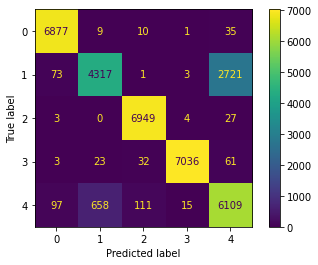

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_Eval, y_Eval)  

In [ ]:
pickle.dump(clf, open('rnfrstpickle', 'wb'))

In [ ]:
from joblib import dump, load
dump(clf, 'rndfrst.joblib') 

['rndfrst.joblib']

In [ ]:
X_train

,SAN Count,as_no,data.http.result.response.content_length,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.connection,data.http.result.response.headers.content_type,data.http.result.response.headers.etag,data.http.result.response.headers.location,data.http.result.response.headers.retry_after,data.http.result.response.headers.server,data.http.result.response.headers.via,data.http.result.response.status_code,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,data.tls.status
116489,2,520,134.0,0,0,7,47,0,1,0,471,0,6,76,242,50,1309,2
24072,2,569,915.0,0,0,7,47,0,0,0,67,1,14,76,213,1126,197,2
90208,8,1657,-1.0,0,88,0,71,0,0,0,35,0,2,1,4,2,11,2
96671,5,1657,163.0,1,261,2,47,0,0,0,248,0,2,76,784,2,11,2
110245,2,520,494.0,0,142,7,66,0,0,0,72,0,15,30,127,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2,520,134.0,0,0,7,47,0,1,0,471,0,6,76,53,2,11,2
103694,0,1147,864.0,1,0,3,47,1,0,0,35,0,2,76,222,2,975,2
131932,0,177,6997.0,0,0,2,47,0,0,0,1,0,2,1,4,2,11,0
146867,0,1211,0.0,0,0,0,2,0,0,0,1,0,0,1,4,2,11,0
